In [3]:
import pandas as pd
import numpy as np
#!pip3 install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
#import geopandas as gpd
#from descartes.patch import PolygonPatch

df = pd.read_csv('GFM_data.csv', sep = '\t')


df.head()

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donations,Length_of_Fundraising,FB_Shares,Number_of_Donors,Followers,Text
0,0,https://www.gofundme.com/f/justiceforjacobblake,Medical,0,Justice for Jacob Blake,"Kenosha, WI",2297930.0,3000000.0,73K,93 days 12:02:38.405126000,118K,72.5K,73.4K,On August 23rd my son was shot multiple times ...
1,0,https://www.gofundme.com/f/official-navajo-nat...,Medical,0,Official Navajo Nation COVID-19 Relief Fund,"Window Rock, AZ",1862040.0,1000000.0,22.5K,205 days 12:02:39.366241000,71.7K,21.9K,22K,\nThe Navajo Nation COVID-19 Fund has been est...
2,0,https://www.gofundme.com/f/help-a-front-line-n...,Medical,0,Help a front line nurse and baby get proper care,"Randolph, NJ",954793.0,1200000.0,19K,215 days 12:02:40.340314000,16.4K,18.3K,17.9K,"On Sunday, April 12, Sylvia Leroy, a pregnant ..."
3,0,https://www.gofundme.com/f/Tommy-Rivers-Rest-Up,Medical,1,"Rest up, Tommy, we'll see you soon","Scottsdale, AZ",673179.0,1000000.0,11.3K,131 days 12:02:41.464483000,21.3K,10.3K,10.4K,"First, thank you for being here. Tommy Rivers ..."
4,0,https://www.gofundme.com/f/brandon039s-medical...,Medical,1,OFFICIAL BRANDON SAENZ MEDICAL FUND,"Tyler, TX",570529.0,750000.0,24.7K,175 days 12:02:42.383091000,5.5K,24.3K,24.5K,My name is Melissa Green and I am the mother o...


## Cleaning the data

Transforming Number_of_Donations, FB_Shares, Number_of_Donors, and Followers from Strings to floats

In [4]:
def helper(x):
    ## if string will make numeric
    if isinstance(x,str):
        x = x.replace(',','')
        ## if has ".1k" will change to numeric
        if '.' in x and 'K' in x:
            x = x.replace('.','')
            x = x.replace('K','00')
        ## if "k" will change to numeric
        if 'K' in x:
            x = x.replace('K','000')
        return x
    ## return nan
    else:
        return x
df['Number_of_Donations'] = df['Number_of_Donations'].apply(helper).astype(float)
df['FB_Shares'] = df['FB_Shares'].apply(helper).astype(float)
df['Number_of_Donors'] = df['Number_of_Donors'].apply(helper).astype(float)
df['Followers'] = df['Followers'].apply(helper).astype(float)

In [5]:
df = df.dropna()

In [6]:
df['Length_of_Fundraising']= df['Length_of_Fundraising'].apply(lambda x: int(x[:-24]))

In [7]:
df.head()

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donations,Length_of_Fundraising,FB_Shares,Number_of_Donors,Followers,Text
0,0,https://www.gofundme.com/f/justiceforjacobblake,Medical,0,Justice for Jacob Blake,"Kenosha, WI",2297930.0,3000000.0,73000.0,93,118000.0,72500.0,73400.0,On August 23rd my son was shot multiple times ...
1,0,https://www.gofundme.com/f/official-navajo-nat...,Medical,0,Official Navajo Nation COVID-19 Relief Fund,"Window Rock, AZ",1862040.0,1000000.0,22500.0,205,71700.0,21900.0,22000.0,\nThe Navajo Nation COVID-19 Fund has been est...
2,0,https://www.gofundme.com/f/help-a-front-line-n...,Medical,0,Help a front line nurse and baby get proper care,"Randolph, NJ",954793.0,1200000.0,19000.0,215,16400.0,18300.0,17900.0,"On Sunday, April 12, Sylvia Leroy, a pregnant ..."
3,0,https://www.gofundme.com/f/Tommy-Rivers-Rest-Up,Medical,1,"Rest up, Tommy, we'll see you soon","Scottsdale, AZ",673179.0,1000000.0,11300.0,131,21300.0,10300.0,10400.0,"First, thank you for being here. Tommy Rivers ..."
4,0,https://www.gofundme.com/f/brandon039s-medical...,Medical,1,OFFICIAL BRANDON SAENZ MEDICAL FUND,"Tyler, TX",570529.0,750000.0,24700.0,175,5500.0,24300.0,24500.0,My name is Melissa Green and I am the mother o...


# Exploration

In [8]:
# add commas for every 3 digits on x_axis
def add_commas_xlabels(ax):
    xlabels = [format(label, ',.0f') for label in ax.get_xticks()]
    ax.set_xticklabels(xlabels)

# draw bar chart
def draw_bar(data, important_color, \
             num_important, neutral_color, \
             num_neutral, title, xlab, fig, format_state):
    
    colors = np.repeat(important_color,num_important)
    colors = np.append(colors, np.repeat(neutral_color, num_neutral))
    ax = data.plot(kind='barh', figsize=fig, color=colors)
    
    plt.xlabel(xlab)
    plt.title(title)
    
    add_commas_xlabels(ax)
    
    for index, value in enumerate(data):
        if format_state:
            plt.text(value, index, str('{:,}'.format(round(value))))
        else:
            plt.text(value, index, str(value))

<ipython-input-8-2da716031f3a>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


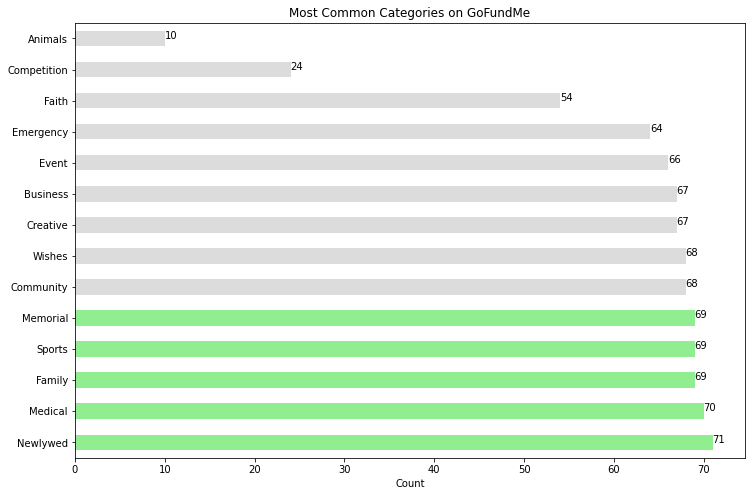

In [9]:
category_count = df['Category'].value_counts()
draw_bar(category_count, 'lightgreen', 5, 'gainsboro', 9, \
         'Most Common Categories on GoFundMe', 'Count', (12,8), False)

In [10]:
grouped_df = df.groupby('Category')[['Amount_Raised','Goal','Number_of_Donations', 'Length_of_Fundraising', 'FB_Shares', 'Number_of_Donors', 'Followers']].mean()

<ipython-input-8-2da716031f3a>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


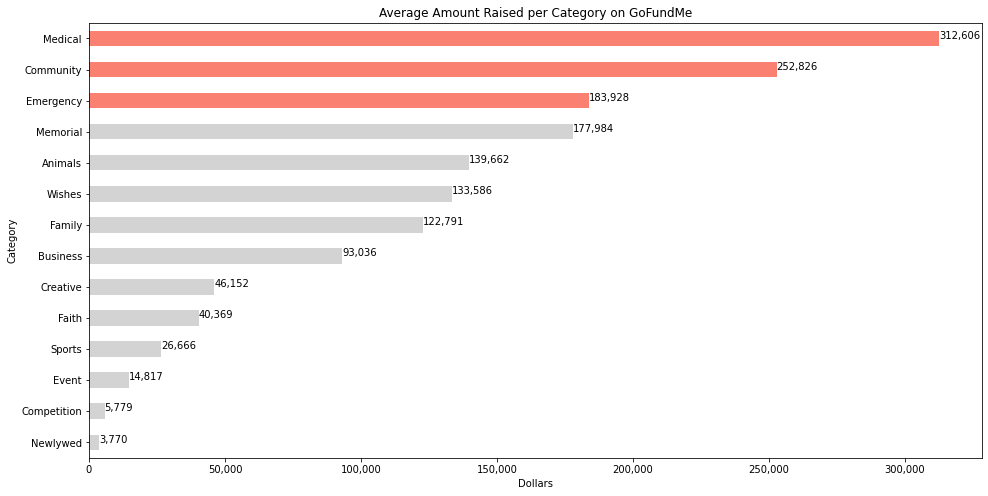

In [11]:
amt_raised_per_category = grouped_df['Amount_Raised'].sort_values()
draw_bar(amt_raised_per_category, 'lightgray', 11, 'salmon', 3, \
         'Average Amount Raised per Category on GoFundMe', 'Dollars', (16,8), True)

In [12]:
df['Amount_Raised'].describe()

count    8.360000e+02
mean     1.158010e+05
std      3.220597e+05
min      6.370000e+02
25%      1.953400e+04
50%      5.287100e+04
75%      1.234118e+05
max      6.750030e+06
Name: Amount_Raised, dtype: float64

In [13]:
df['Reach Goal?'] = df['Amount_Raised'] < df['Goal']


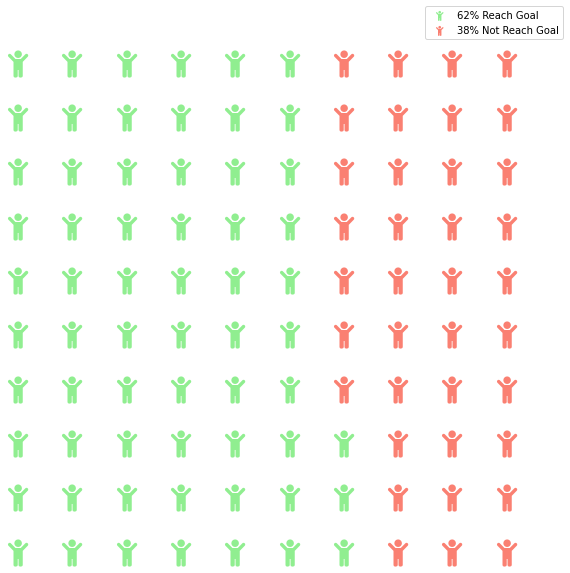

In [33]:
#!pip3 install pywaffle
from pywaffle import Waffle

reach_goal = df['Reach Goal?'].value_counts().to_numpy()
total = sum(reach_goal)
proportions = [(float(value) / total)*100 for value in reach_goal]

fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=proportions,
    labels=[str(round(proportions[0]))+'% Reach Goal', str(round(proportions[1]))+'% Not Reach Goal'],
    figsize=(12, 8),
    legend={'bbox_to_anchor': (1.05, 1.05)},
    colors=("lightgreen", "salmon"),
    icons='child', 
    icon_legend=True
)

In [17]:
df['Goal'].describe()

count    8.360000e+02
mean     1.542914e+05
std      3.028832e+05
min      1.000000e+00
25%      2.000000e+04
50%      7.500000e+04
75%      1.500000e+05
max      3.000000e+06
Name: Goal, dtype: float64

## Visualizations on Category

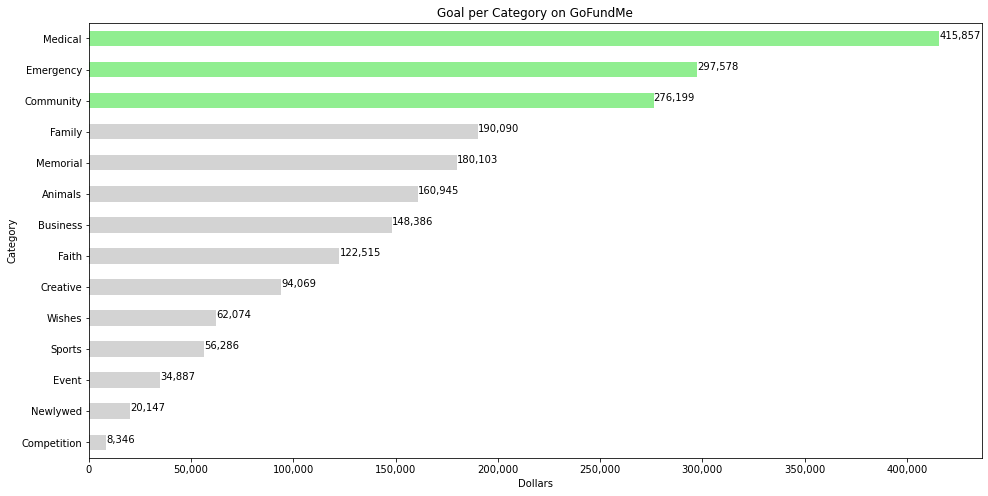

In [13]:
goal_per_category = grouped_df['Goal'].sort_values()
draw_bar(goal_per_category, 'lightgray', 11, 'lightgreen', 3, \
         'Goal per Category on GoFundMe', 'Dollars', (16,8), True)

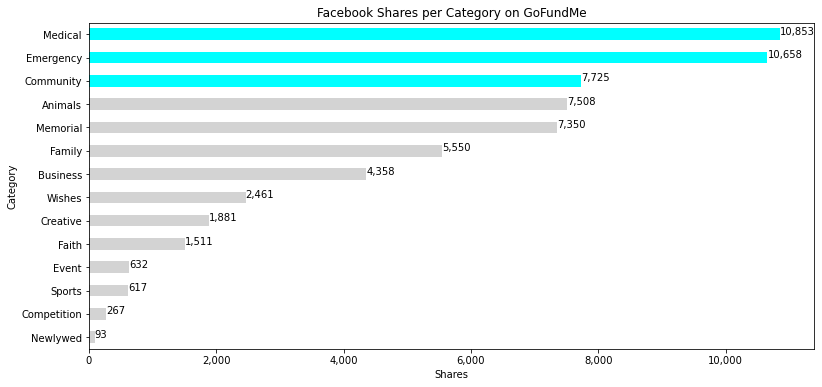

In [14]:
fb_share = grouped_df['FB_Shares'].sort_values()
draw_bar(fb_share, 'lightgray', 11, 'cyan', 3, \
         'Facebook Shares per Category on GoFundMe', 'Shares', (13,6), True)

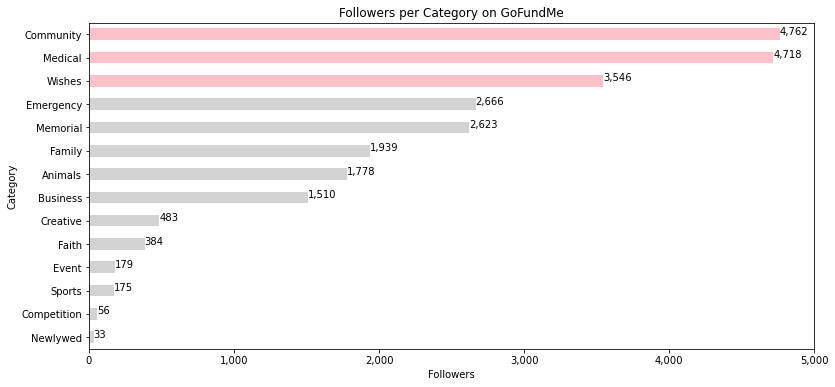

In [15]:
followers = grouped_df['Followers'].sort_values()
draw_bar(followers, 'lightgray', 11, 'pink', 3, \
         'Followers per Category on GoFundMe', 'Followers', (13,6), True)

## Visualizations on Amount_Raised

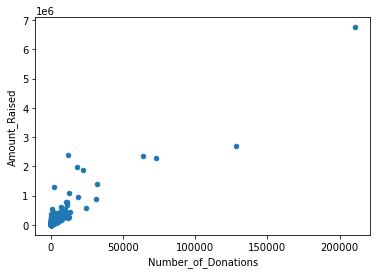

In [16]:
df.plot(kind='scatter', x ='Number_of_Donations', y = 'Amount_Raised')

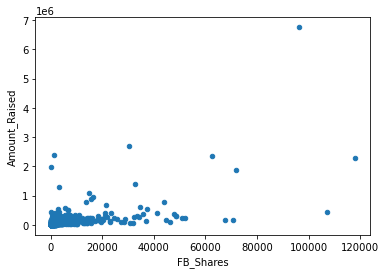

In [17]:
df.plot(kind='scatter', x='FB_Shares', y='Amount_Raised')

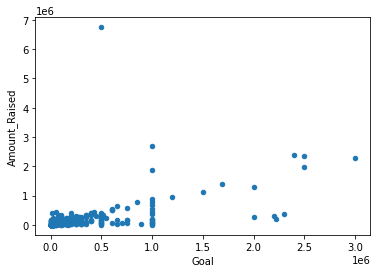

In [18]:
df.plot(kind='scatter', x='Goal', y='Amount_Raised')

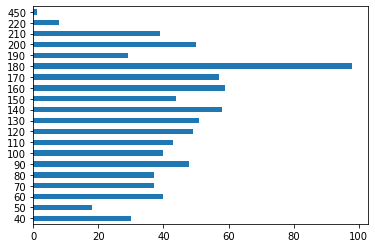

In [19]:
df['Length_of_Fundraising'].round(-1).value_counts().sort_index().plot(kind='barh')

# Geopandas 

In [20]:
from shapely.geometry import Point
from arcgis.gis import GIS
from arcgis.geocoding import Geocoder, get_geocoders, geocode
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim

ModuleNotFoundError: No module named 'shapely'

In [21]:
locator = Nominatim(user_agent="myGeocoder")
#geolocator = Nominatim(user_agent="specify_your_app_name_here")
#geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# 1 - convenient function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
df = df.assign(address = df['Location'].apply(geocode))
# 3 - create longitude, latitude and altitude from location column (returns tuple)
df = df.assign(point = df['address'].apply(lambda loc: tuple(loc.point) if loc else None))
df.head()

NameError: name 'Nominatim' is not defined

In [22]:
df['Latitude'] = df['point'].dropna().apply(lambda x: x[0])
df['Longitude'] = df['point'].dropna().apply(lambda x: x[1])

KeyError: 'point'

In [23]:
df['geometry'] = df.apply(lambda x:Point(x['Longitude'], x['Latitude']) ,axis = 1)
gdf = gpd.GeoDataFrame(df, geometry = 'geometry')

NameError: name 'Point' is not defined

In [24]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us = world[world['name'] == 'United States of America']

NameError: name 'gpd' is not defined

In [25]:
base = world.plot(figsize = (20,20))
## creating scales
x_max = gdf['Amount_Raised'].max()
x_min = gdf['Amount_Raised'].min()
max_size = 2000
min_size = 2
## adding circles
gdf.plot(ax=base, marker='o', color='black', markersize=min_size + (max_size-min_size)*(gdf['Amount_Raised']/x_max));
plt.title('Amount Raised per Fundraiser')


NameError: name 'world' is not defined

In [26]:
us_points = gdf[gdf['geometry'].apply(lambda x: x.within(us.geometry[4]))]

NameError: name 'gdf' is not defined

In [27]:
base = us.plot(figsize = (20,20))
## creating scales
x_max = us_points['Amount_Raised'].max()
x_min = us_points['Amount_Raised'].min()
max_size = 2000
min_size = 2
us_points.plot(ax=base, marker='o', color='black', markersize=min_size + (max_size-min_size)*(us_points['Amount_Raised']/x_max));
plt.title('Amount Raised per Fundraiser')


NameError: name 'us' is not defined

In [28]:
df[df['Location'].apply(lambda x: 'TX' in x)]
#maximum.plot(ax = base, color='black', markersize=min_size + (max_size-min_size)*(us_points['Amount_Raised']/x_max));

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donations,Length_of_Fundraising,FB_Shares,Number_of_Donors,Followers,Text,Reach Goal?
4,0,https://www.gofundme.com/f/brandon039s-medical...,Medical,1,OFFICIAL BRANDON SAENZ MEDICAL FUND,"Tyler, TX",570529.0,750000.0,24700.0,175,5500.0,24300.0,24500.0,My name is Melissa Green and I am the mother o...,True
6,0,https://www.gofundme.com/f/help-mattress-mack-...,Medical,2,Help Mattress Mack Save Camp Hope,"Houston, TX",447990.0,1000000.0,1800.0,106,84.0,188.0,174.0,Mattress Mack invites you to help him SAVE CAM...,True
16,0,https://www.gofundme.com/f/save-dogu039s-life,Medical,5,Save DOGU's Life...,"El Paso, TX",2400100.0,2400000.0,12300.0,115,1300.0,10800.0,10800.0,DOĞU’YA GÜNEŞ SİZLERİN DESTEĞİ İLE DOĞSUN … Me...,False
23,0,https://www.gofundme.com/f/health-justice-and-...,Medical,7,#HisNameIsJustinHowell,"San Marcos, TX",219364.0,250000.0,7800.0,175,13200.0,7700.0,7800.0,\nMy name is Gregory Arellano and I'm starting...,True
47,0,https://www.gofundme.com/f/a5tj5-todos-con-moy,Medical,15,TODOS CON MOI,"Houston, TX",159172.0,250000.0,1800.0,92,3900.0,1700.0,1700.0,Moisés Yahir Benitah Luna (conocido por todos ...,True
51,0,https://www.gofundme.com/f/support-claire-in-b...,Medical,17,Help Claire's Battle Against Advanced Lung Cancer,"El Paso, TX",155032.0,250000.0,875.0,109,3900.0,862.0,864.0,After dedicating herself to studying medicine ...,True
53,0,https://www.gofundme.com/f/dinah-powers,Medical,17,"Dinah ""has the"" Powers","Houston, TX",150780.0,150000.0,3200.0,71,4200.0,3100.0,3200.0,Dinah Powers...the one and only Dinah Powers! ...,False
85,0,https://www.gofundme.com/f/in-memory-of-saji-a...,Memorial,4,In Memory of Saji & Julie Abraham,"Houston, TX",221767.0,200000.0,1800.0,152,3100.0,1700.0,1800.0,"Our Uncle, Saji Abraham, suddenly departed thi...",False
94,0,https://www.gofundme.com/f/support-fund-for-ra...,Memorial,7,Rama Prasad (RamP)'s family support fund,"Plano, TX",169732.0,250000.0,3100.0,162,1500.0,3000.0,3000.0,"Rama Prasad (RamP) was a loving husband, carin...",True
112,0,https://www.gofundme.com/f/bringing-yaniv-home,Memorial,13,Bringing Yaniv Home מחזירים את יניב הביתה,"Plano, TX",119417.0,95000.0,1100.0,106,5000.0,1100.0,1100.0,English followed ביום שני 10 לאוגוסט 2020 בש...,False


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('GFM_data.csv', sep = '\t')

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
import string
import requests

UsageError: Line magic function `%tensorflow_version` not found.


In [4]:
text = df.get('Text').to_numpy()
import string
def clean_data(txt_elmt):
    # txt_elmt is each element (each post) in the "text" array
    tokens = txt_elmt.split() # each word
    
    # nothing changes. except removing punctuation
    mytable = str.maketrans('', '', string.punctuation)
    tokens = [word.translate(mytable) for word in tokens]
    return [word.lower() for word in tokens if word.isalpha()]

#for i in text:
# try with text[0] first
tokens = clean_data(text[0]) # list of tokens
length = 51 # learn initial 50 words, predict the next word
lines = [] # lst of all training sequences
sufficiency = 200_000
for i in range(len(tokens)):
    sequence = tokens[i: i + length] # every 50-word
    lines += [' '. join(sequence)]
    if i > sufficiency:
        break

In [6]:
!pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

Using legacy 'setup.py install' for termcolor, since package 'wheel' is not installed.
    Running setup.py install for termcolor: started
    Running setup.py install for termcolor: finished with status 'done'
